In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os 
import librosa
import librosa.display
import glob
import skimage

from scipy.io import wavfile

import dabl

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [197]:
df = pd.read_csv('../data_notes.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,NameID,Lenght,ClassID
0,1A#.wav,0.903991,1
1,1A.wav,0.890998,1
2,1B.wav,1.180998,2
3,1C#.wav,1.055011,3
4,1C.wav,1.053991,3


<AxesSubplot:>

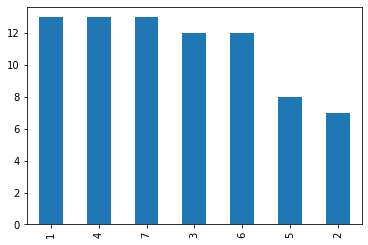

In [198]:
df['ClassID'].value_counts().plot(kind='bar')

In [199]:
d1, samp1 = librosa.load('../input/1B.wav')
d2, samp2 = librosa.load('../input/1C.wav')

Text(0.5, 1.0, 'Linear spectrogramm')

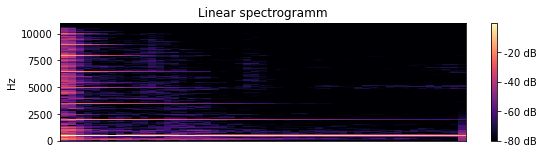

In [200]:
plt.figure(figsize=(20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(d1)), ref=np.max)
plt.subplot(4,2,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear spectrogramm')

Text(0.5, 1.0, 'Linear spectrogramm')

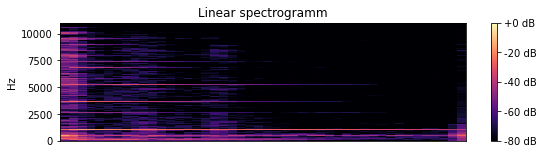

In [201]:
plt.figure(figsize=(20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(d2)), ref=np.max)
plt.subplot(4,2,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear spectrogramm')

In [202]:
d1, samp1 = librosa.load('../input/1D#.wav')
arr = librosa.feature.melspectrogram(y=d1, sr=samp1)
arr.shape

(128, 42)

In [203]:
feature = []
label = []

In [204]:
def parser(row):
    for i in range(78):
        filename = '../input/' + df['NameID'][i]
        X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        feature.append(mels)
        label.append(df['ClassID'][i])
    return [feature, label]
        
        

In [205]:
temp = parser(df)

In [206]:
temp

[[array([2.83252884e-04, 4.00242337e-04, 1.91656556e-02, 1.49868846e-01,
         3.48647274e-02, 1.70660466e-02, 1.05388775e-01, 5.39516918e-02,
         2.34719235e-02, 1.91949476e-02, 9.43095610e-03, 8.24432354e-03,
         6.85885223e-03, 1.55880768e-02, 3.52469608e-02, 2.29627103e-01,
         4.30188847e+00, 4.96287231e+01, 9.55842018e+00, 5.27928919e-02,
         2.40746327e-02, 7.04727648e-03, 9.27205954e-04, 3.20433901e-04,
         1.46727849e-04, 3.18382023e-04, 1.36296952e-03, 2.15866859e-03,
         2.78353202e-03, 2.41252244e-03, 1.12009794e-03, 6.85176346e-04,
         1.01294031e-03, 4.36011655e-03, 2.16693193e-01, 3.77114820e+00,
         1.36410618e+00, 1.18463496e-02, 3.58425849e-03, 6.82149269e-03,
         1.81378238e-03, 1.43261408e-04, 5.84846530e-05, 1.21515281e-04,
         3.78892961e-04, 3.91023030e-04, 4.60265437e-04, 1.92653941e-04,
         4.15282957e-05, 4.59948169e-05, 1.96885271e-03, 1.66396110e-03,
         3.73109651e-05, 2.55793566e-05, 2.94392266

In [207]:
temp = np.array(temp)

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_8348/664304316.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)


In [208]:
data = temp.transpose()

In [209]:
X_ = data[:,0]
Y = data[:,1]
print(X_.shape, Y.shape)

(78,) (78,)


In [210]:
Y

array([1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 7, 1, 1, 2, 3, 3,
       4, 4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 1,
       1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], dtype=object)

In [211]:
X = np.empty([78, 128])

In [212]:
for i in range(78):
    X[i] = (X_[i])

In [213]:
Y

array([1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 1, 1, 2, 2, 3, 3, 4, 4, 5,
       6, 6, 7, 7, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 7, 1, 1, 2, 3, 3,
       4, 4, 4, 5, 6, 6, 7, 7, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 1,
       1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], dtype=object)

In [214]:
Y = to_categorical(Y)

In [215]:
Y[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [216]:
print(f'Shapes:\nX: {X.shape}\nY: {Y.shape}')

Shapes:
X: (78, 128)
Y: (78, 8)


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [227]:
X_train = X_train.reshape(58, 16, 8, 1)
X_test = X_test.reshape(78-58, 16, 8, 1)

In [228]:
input_dim = (16,8,1)

In [229]:
model = Sequential()

In [230]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_dim))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [231]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 2.3449 - accuracy: 0.2809 - val_loss: 2.6412 - val_accuracy: 0.3000
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 2.1424 - accuracy: 0.4817 - val_loss: 1.1226 - val_accuracy: 0.5500
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.9419 - accuracy: 0.6748 - val_loss: 1.3271 - val_accuracy: 0.5500
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 0.6675 - accuracy: 0.8152 - val_loss: 0.9846 - val_accuracy: 0.6500
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.5454 - accuracy: 0.8608 - val_loss: 0.9005 - val_accuracy: 0.7500
Epoch 6/100
6/6 [==============================] - 0s 21ms/step - loss: 0.4859 - accuracy: 0.8688 - val_loss: 0.8837 - val_accuracy: 0.7000
Epoch 7/100
6/6 [==============================] - 0s 23ms/step - loss: 0.2868 - accuracy: 0.9653 - val_loss: 0.9381 - val_accuracy: 0.8000
Epoch 8/100
6/6 [===

In [233]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 2, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)             

In [234]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

1/1 [==============================] - 0s 131ms/step - loss: 1.3482 - accuracy: 0.8000
[1.3482497930526733, 0.800000011920929]


In [235]:
preds = np.argmax(predictions, axis=1)

In [236]:
result = pd.DataFrame(preds)
result.to_csv('DWS_middle_results.csv')

In [237]:
feature = []
label = []

for elem in os.listdir('../buff_input'):
    X, sample_rate = librosa.load(f'../buff_input/{elem}', res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    feature.append(mels)
    label.append(elem)

In [238]:
feature = np.array(feature)

In [239]:
feature = feature.reshape(-1, 16, 8, 1)

In [240]:
res = np.argmax(model.predict(feature), axis=1)

In [241]:
res = {x:y-1 if y != 1 else 7 for x, y in zip(label, res)}

In [242]:
res

{'2f1A#.wav': 1,
 '2f1B.wav': 2,
 '2f1C#.wav': 3,
 '2f1C.wav': 3,
 '2f1D#.wav': 4,
 '2f1D.wav': 3,
 '2f1E.wav': 3,
 '2f1E12.wav': 5,
 '2f1F#.wav': 3,
 '2f1F.wav': 6,
 '2f1G.wav': 7,
 '2f2B.wav': 2,
 '2f2B12.wav': 2,
 '2f2C#.wav': 3,
 '2f2C.wav': 3,
 '2f2D#.wav': 4,
 '2f2D.wav': 3,
 '2f2E.wav': 5,
 '2f2F#.wav': 6,
 '2f2F.wav': 5,
 '2f2G#.wav': 7,
 '2f2G.wav': 6,
 '2f3A#.wav': 2,
 '2f3A.wav': 1,
 '2f3B.wav': 2,
 '2f3C#.wav': 3,
 '2f3C.wav': 3,
 '2f3D#.wav': 3,
 '2f3D.wav': 4,
 '2f3E.wav': 4,
 '2f3F#.wav': 6,
 '2f3F.wav': 6,
 '2f3G#.wav': 1,
 '2f3G.wav': 7,
 '2f3G12.wav': 7,
 '2f4A#.wav': 2,
 '2f4A.wav': 3,
 '2f4B.wav': 3,
 '2f4C#.wav': 4,
 '2f4C.wav': 3,
 '2f4D#.wav': 5,
 '2f4D.wav': 4,
 '2f4E.wav': 5,
 '2f4F#.wav': 7,
 '2f4F.wav': 6,
 '2f4G#.wav': 1,
 '2f4G.wav': 7,
 '2f5A#.wav': 2,
 '2f5A.wav': 1,
 '2f5A12.wav': 1,
 '2f5B.wav': 2,
 '2f5C#.wav': 3,
 '2f5C.wav': 3,
 '2f5D#.wav': 4,
 '2f5D.wav': 2,
 '2f5E.wav': 5,
 '2f5F#.wav': 6,
 '2f5F.wav': 5,
 '2f5G#.wav': 7,
 '2f5G.wav': 7,
 '2f6A#.w